<a href="https://colab.research.google.com/github/dinraj910/Car-Price-Predictor/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [ ]:
from datasets import load_dataset

ds = load_dataset("VarunKumarGupta2003/Car-Price-Dataset",split="train")
df = pd.DataFrame(ds)

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

car_sales_data.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine Size   10000 non-null  float64
 4   Mileage       10000 non-null  int64  
 5   Fuel Type     10000 non-null  object 
 6   Transmission  10000 non-null  object 
 7   Price         10000 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


,Year,Engine Size,Mileage,Price
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,2010.574300,2.76482,99292.395800,24853.320959
std,6.324056,1.00941,57811.288734,5172.634275
min,2000.000000,1.00000,5.000000,8657.963423
25%,2005.000000,1.90000,49217.750000,21159.737460
50%,2011.000000,2.80000,99345.000000,24828.917262
75%,2016.000000,3.60000,149568.000000,28486.241217
max,2021.000000,4.50000,199987.000000,40739.892708


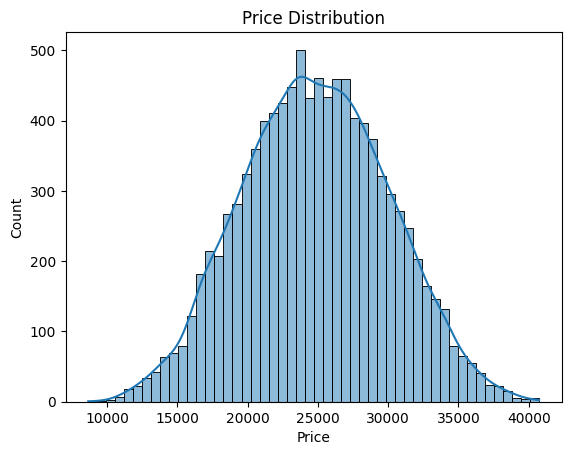

In [ ]:
sns.histplot(df['Price'],bins=50,kde=True)
plt.title("Price Distribution")
plt.show()

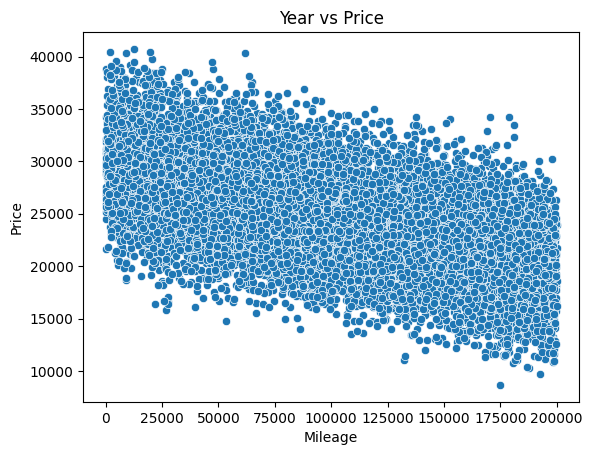

In [ ]:
sns.scatterplot(data=df,x="Mileage",y="Price")
plt.title("Year vs Price")
plt.show()

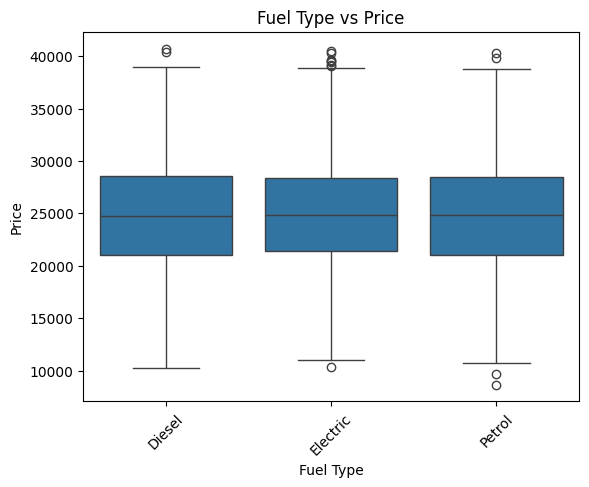

In [ ]:
sns.boxplot(data=df,x="Fuel Type",y="Price")
plt.title("Fuel Type vs Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Car_Age'] = df['Year'].max() - df['Year']

In [ ]:
df = df.dropna()

In [ ]:
# Preprocessing

categorical_feats = ['Make', 'Model', 'Fuel Type', 'Transmission']
numeric_feats = ['Mileage', 'Engine Size', 'Car_Age']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
])

In [ ]:
models = {
    "LinearRegression": Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',LinearRegression())
    ]),
    "RandomForest":Pipeline([
        ("preprocessor",preprocessor),
        ('regressor',RandomForestRegressor(n_estimators=100,random_state=42))
    ])
}

In [ ]:
X = df[numeric_feats + categorical_feats]
y = df['Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
results={}

for name,mod in models.items():
  mod.fit(X_train,y_train)
  y_pred = mod.predict(X_test)
  results[name]={
      'MAE': mean_absolute_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R2': r2_score(y_test, y_pred)
  }
  print(f"{name} results:", results[name])

LinearRegression results: {'MAE': 1608.0954361774004, 'RMSE': np.float64(1995.0189715016807), 'R2': 0.850752246107692}
RandomForest results: {'MAE': 1704.493506802386, 'RMSE': np.float64(2124.9289554194215), 'R2': 0.8306822171100178}


In [ ]:
# %% 8. Save best model
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
joblib.dump(best_model, "car_price_model.pkl")

['car_price_model.pkl']